<a href="https://colab.research.google.com/github/theyastustory/Predicting_Score_of_Student_Studying_9.25hrs/blob/main/Task1_SupervisedMLprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##  Problem Statement :Using supervised ML find What will be predicted score if a student studies for 9.25 hrs/ day?

 

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Importing Dataset
dataset= "/content/Dataset - dataset.csv"
df=pd.read_csv(dataset)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
df.shape

(25, 2)

In [5]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

Given Dataset has 25 rows and 2 columns and has no null Values.

In [6]:
df.describe() 

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000





1.   From this We can Conclude that, the highest number of Hour that any student has Studied is 9.2hr while the highest Score got by any student is 95%

2.   The lowest number of Hour that any student has Studied is 1.10hr while the lowest Score got by any student is 17%

3.  The mean hour that the Student has studied is 5.01 while the mean Score that got was 51.48




In [7]:
# Finding Correlation
df.Scores.corr(df.Hours)

0.9761906560220887

As we can see that our df has strong positive linear Coorelation between Scores and Hours so we plot them by using scatterplot to show this Clearly.

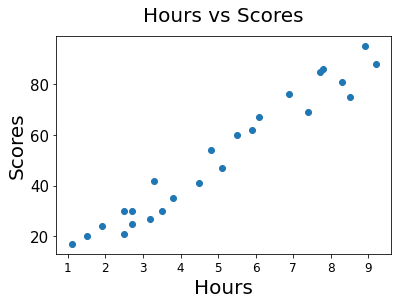

In [8]:
plt.scatter(x="Hours",y="Scores",data=df)
plt.xlabel('Date',fontsize = 25)
plt.xlabel("Hours",fontsize=20);
plt.tick_params(axis='x', which='major', labelsize=12)
plt.ylabel("Scores",fontsize=20);
plt.tick_params(axis='y', which='major', labelsize=15)
plt.title("Hours vs Scores",fontsize=20,pad=15);
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

 # **Predicting Score**

In [10]:
 # Importing Scikit Learn Library
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics  

In [11]:
# Preparing the Dataset
hour=df[["Hours"]]
hour
score=df[["Scores"]]
score

,Scores
0,21
1,47
2,27
3,75
4,30
5,20
6,88
7,60
8,81
9,25


In [12]:
# Creating Training Model
hour_train,hour_test,score_train,score_test=train_test_split(hour,score,
                 test_size=0.2,
                 random_state=0)

### Since we have splitted our data into  training and testing sets, so now we train our model 

In [14]:
model=LinearRegression().fit(hour_train,score_train)
model.coef_,model.intercept_


(array([[9.91065648]]), array([2.01816004]))

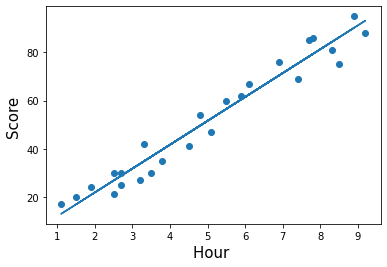

In [15]:
line = model.coef_*hour+model.intercept_
plt.xlabel("Hour ",fontsize=15)
plt.ylabel("Score ",fontsize=15)
plt.scatter(hour, score)
plt.plot(hour, line);
plt.show()

# Generating Predictions

In [17]:
predictions=model.predict(hour_test)
predictions

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [18]:
# Comparing the predictions Model  with the actual Model
(score_test,predictions)

(    Scores
 5       20
 2       27
 19      69
 16      30
 11      62, array([[16.88414476],
        [33.73226078],
        [75.357018  ],
        [26.79480124],
        [60.49103328]]))

In [20]:
# Predicting the  Score  for 9.25 hrs
pred_result=model.predict(np.array([[9.25]]))
pred_result

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[93.69173249]])

## Conclusion:
**We  Conclude that if any student has studied for 9.25 hrs then he can Score 93.69%**

### **Evaluating the model - Finding the error**
This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error.

In [21]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(score_test, predictions)) 

Mean Absolute Error: 4.183859899002982


## **Given Dataset has 4.18 of Mean Absolute Error**